# Adversarial Attacks

## Non-targetted attacks

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# Module imports
import model_lib
tfe=tf.contrib.eager

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [7]:
# Soft placement
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tfe.enable_eager_execution(config=config)

ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
model=model_lib.create_model()

checkpoint_dir='/tmp/tensorflow/mnist/checkpoints'

checkpoint = tf.train.Checkpoint(model=model)
# Restore variables on creation if a checkpoint exists.
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

print(model.summary())

In [4]:
def non_targetted(target, iterations=1000, reg=0):
    # Hyper params
    LR=1
    
    # Path to save
    if not reg:
        path='/tmp/tensorflow/mnist/adv/non/'
    else:
        path='/tmp/tensorflow/mnist/adv/non-reg/'

    if not os.path.exists(path):
        os.makedirs(path)
    
    x=np.random.randn(28,28,1)+128
    d=np.ones(x.shape)
    x=tfe.Variable(x, dtype=tf.float32)
    x= tf.reshape(x,(1,1,784))
    
    C_array=[]
    count=0
    while count < iterations:
    #while (np.max(LR*d)> 1e-3):
        # Compute Gradients
        with tf.GradientTape() as tape:
            tape.watch(x)
            C = model(x,training=False)[0,target]
            C -= reg*tf.norm(x)
        #print(tf.nn.softmax(model(x,training=False)))
        d = tape.gradient(C,x)
        x+= LR *d
        count+=1
        C_array.append(C)
        
    print(count)
    print(np.array(C_array).shape)

    print("logits ",model(x,training=False))
    print("Prediction Probabilities ",tf.nn.softmax(model(x,training=False)))
    
    f, (ax1, ax2) = plt.subplots(2, 1)
    ax1.imshow(x.numpy().reshape(28,28),cmap='Greys')
    ax1.set_title("Adv image for target {}".format(target))
    ax2.plot(np.arange(count)+1,C_array,'r')
    ax2.set_title("Cost with iterations")
    f.tight_layout()
    plt.savefig(os.path.join(path,"adv-{}.jpg".format(target)))
    plt.show()

1000
(1000,)
logits  tf.Tensor(
[[ 3.5949094e+04 -6.8376343e+03  4.2066885e+03 -2.8498025e+04
   1.5398233e+02  4.9283257e+00  1.6036790e+04  6.1254956e+02
   2.7054482e+03 -1.4962839e+04]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


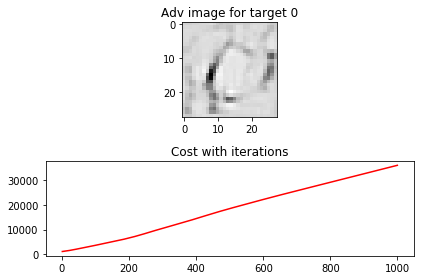

1000
(1000,)
logits  tf.Tensor(
[[ -5290.0933  27592.625  -10720.26   -10758.024    6335.678    1575.6465
    2775.542    1109.8983   2663.0642  -6404.0234]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


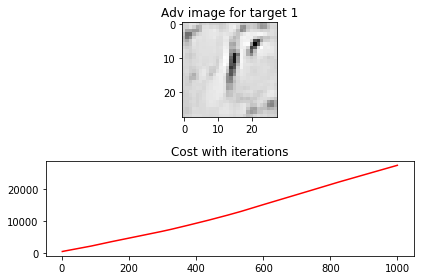

1000
(1000,)
logits  tf.Tensor(
[[ -5141.6157   9166.25    51148.027   -9255.565  -15761.7     -9006.103
   -8113.578   11974.805    3977.5354 -18932.252 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


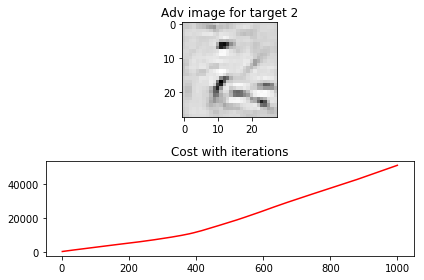

1000
(1000,)
logits  tf.Tensor(
[[-46476.47   -13079.856    -830.3465 102314.414  -23593.1     37426.613
  -32210.377    4159.262    6652.8003  18239.654 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


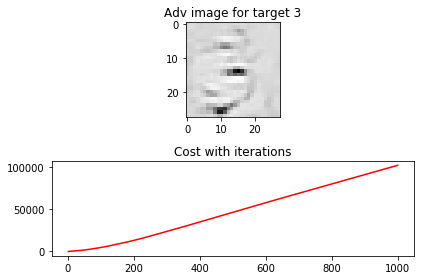

1000
(1000,)
logits  tf.Tensor(
[[-24223.652    5560.0425   1679.0851  -6588.3057  80577.44    11691.144
  -19884.295  -13261.105    1904.3104    869.3471]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


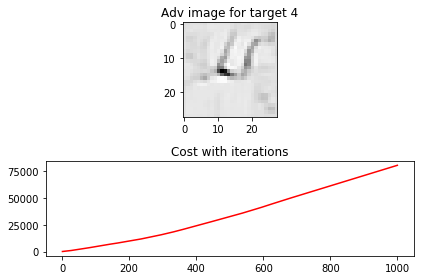

1000
(1000,)
logits  tf.Tensor(
[[-32214.215  -20298.45   -17073.637   29257.334   -6414.8076  89070.62
  -12032.97   -21352.254   16168.762   38732.47  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


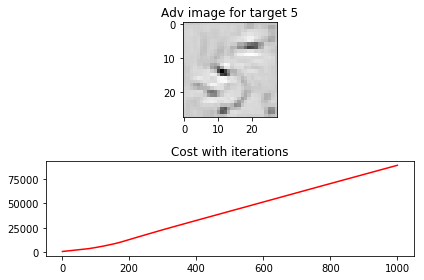

1000
(1000,)
logits  tf.Tensor(
[[  4936.768    -7044.7715     448.17508 -19056.6      -6307.7046
   23159.066    48618.16    -14586.736    20788.592   -23346.062  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)


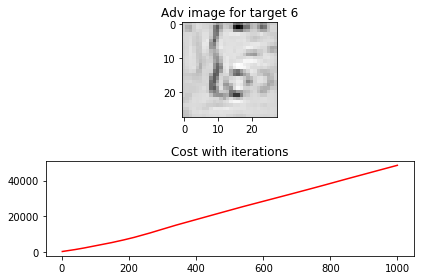

1000
(1000,)
logits  tf.Tensor(
[[ -1771.8339  -1905.9979  -3419.8018  -4962.4194  -1852.4468  12153.231
  -10395.345   37592.11    -1285.9817    892.2513]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)


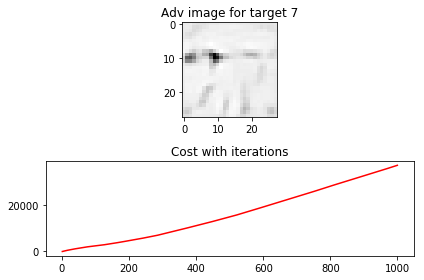

1000
(1000,)
logits  tf.Tensor(
[[-17307.217  -13309.953    1203.4138  10114.524  -13697.942   23064.219
   20290.525  -21696.805   59085.43     4455.063 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)


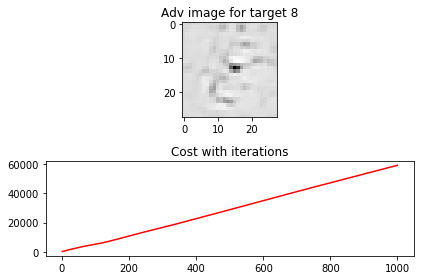

1000
(1000,)
logits  tf.Tensor(
[[-22233.312  -17235.57   -19450.145   31921.473    7411.4634  31116.266
  -24182.791   -9040.835   10227.695   60431.605 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)


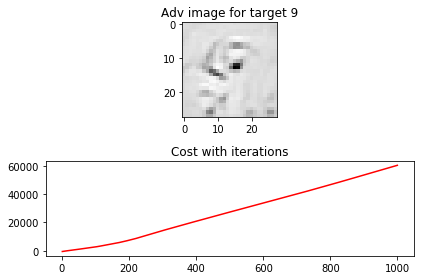

In [5]:
for j in range(10):
    non_targetted(j)

## Targetted attacks

In [3]:
# Module imports
import dataset as mnist_dataset
import model_lib

In [4]:
batch_size=1
data_dir="/tmp/tensorflow/mnist/input_data"
test_ds = mnist_dataset.test(data_dir).batch(batch_size)

In [5]:
def targetted(target, original_image, target_image, iterations=1000, beta=0.01):
    '''
    Args:
    
    * target: class we want it to pass as.
    * target image: class we want it to look like.
    '''
    # Hyperparams
    LR=100

    # Path to save
    path='/tmp/tensorflow/mnist/adv/targetted/'

    if not os.path.exists(path):
        os.makedirs(path)
        
    x= np.random.randn(1,1,784)*50+128
    #x= tf.reshape(original_image,(1,1,784))
    x= tfe.Variable(x, dtype=tf.float32)
    t= tf.reshape(target_image,(1,1,784))
    t= tfe.Variable(t)
    
    target=target.numpy()[0]
    
    one_hot=np.zeros(10)
    one_hot[target]=1
    
    C_array=[]
    count=0
    while count < iterations:
        # Compute Gradients
        with tf.GradientTape() as tape:
            tape.watch(x)
            C = model(x,training=False)#[0,target]
            C= -tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot,logits=C[0])
            
            C -= beta*(tf.reduce_mean(tf.square(x-t)))
            
        #print(tf.nn.softmax(model(x,training=False)))
        d = tape.gradient(C,x)
        x= x+ LR *d
        count+=1
        C_array.append(C)
        
    print(C_array[0])

    #print("logits ",model(x,training=False))
    print("Prediction Class ",np.argmax(tf.nn.softmax(model(x,training=False))))
    
    f, (ax1, ax2, ax3) = plt.subplots(3, 1)
    cax1=ax1.imshow(x.numpy().reshape(28,28),cmap='Greys')
    ax1.set_title("Adv image for target {}".format(target))
    f.colorbar(cax1)
    ax2.plot(np.arange(count)+1,C_array,'r')
    ax2.set_title("Cost with iterations")
    ax3.imshow(original_image.numpy().reshape(28,28),cmap="Greys")
    ax3.set_title("Intended target")
    f.tight_layout()
    plt.savefig(os.path.join(path,"adv-{}.jpg".format(target)))
    plt.show()

In [6]:
done=[]
# What we want it to look like
for i, t in test_ds:
    original_image=i
    original_target=t
    break

print("Class being attacked is", original_target.numpy()[0])
for image,target in test_ds:
    if len(done)==3:
        break
    if target in done:
        continue
    else:
        done.append(target)
    print("Target image ",target.numpy()[0])
    print("Target ",original_target.numpy()[0])
    targetted(original_target,image,original_image)

RuntimeError: dataset.__iter__() is only supported when eager execution is enabled.

In [71]:
def adding_noise(orignial_image,target,target_image, iterations=100):
    # Hyperparams
    alpha=1.0
    
    # Path to save
    path='/tmp/tensorflow/mnist/adv/adding_noise/'

    if not os.path.exists(path):
        os.makedirs(path)
        
    x= np.random.randn(1,1,784)+128
    x= tfe.Variable(x, dtype=tf.float32)
    o= tf.reshape(original_image,(1,1,784))
    o= tfe.Variable(o)
    t= tf.reshape(target_image,(1,1,784))
    t= tfe.Variable(t)

    # target variable
    target=target.numpy()[0]
    
    C_array=[]
    count=0
    while count < iterations:
        # Compute Gradients
        with tf.GradientTape() as tape:
            tape.watch(x)
            C = model(x + o,training=False)[0,target]
            
        #print(tf.nn.softmax(model(x,training=False)))
        d = tape.gradient(C,x)
        x= x+ alpha *d
        alpha = 1.0 / (np.std(d.numpy()) + 1e-8)
        count+=1
        C_array.append(C)

    print("logits ",model(x,training=False))
    print("Prediction Probabilities ",tf.nn.softmax(model(x,training=False)))
    
    f, (ax1, ax2) = plt.subplots(2, 1)
    ax1.imshow((x+o).numpy().reshape(28,28),cmap='Greys')
    ax1.set_title("Adv image for target {}".format(target))
    ax2.plot(np.arange(count)+1,C_array,'r')
    ax2.set_title("Cost with iterations")
    f.tight_layout()
    plt.savefig(os.path.join(path,"adv-{}.jpg".format(target)))
    plt.show()

Target  tf.Tensor([7], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[  512.72296   467.19122 -3695.7158  -3551.0215  -2866.9587   4092.4001
  -2307.2336  12391.68      740.254    -676.68555]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)


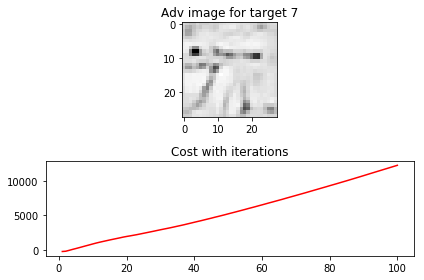

Target  tf.Tensor([2], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[ 2731.2476   4818.1875  20289.873   -8858.039    -325.88284 -6561.7646
  -1770.111    -818.3472    529.39545 -8184.302  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


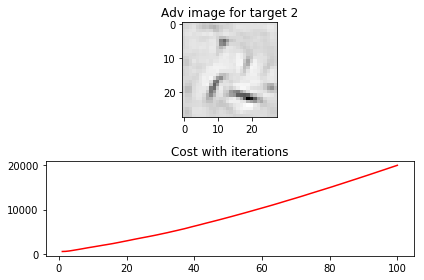

Target  tf.Tensor([1], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-4941.5767 11663.326  -4728.3403 -1724.2556  4583.1436 -1690.7821
   -609.6831  2129.8682  2091.5664 -1769.557 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


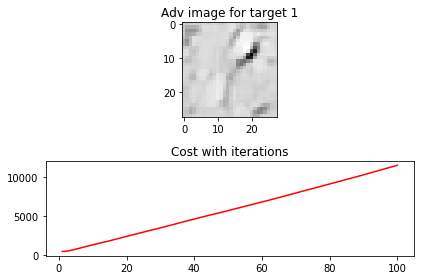

Target  tf.Tensor([0], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[13177.611   -2319.3232   -982.6932  -6419.728    -137.29996  2767.2048
   4007.7744   2009.4462  -1998.561   -3608.6567 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


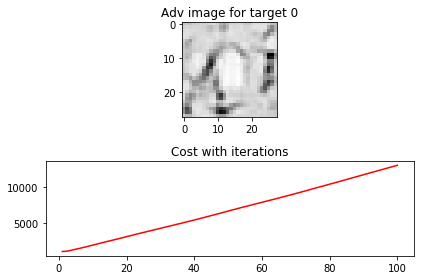

Target  tf.Tensor([4], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-1247.6505   3083.9727  -1045.7367  -6577.2314  17793.46    -2817.7944
   -140.97728 -1535.2999    307.49573 -4606.8813 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


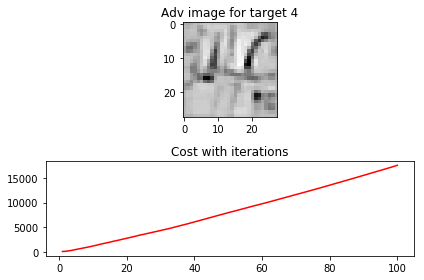

Target  tf.Tensor([1], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-5169.023   12283.89    -5016.4365  -2452.8071   3206.3035   -538.4526
    434.81882  2252.6987   3140.566   -1547.2056 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


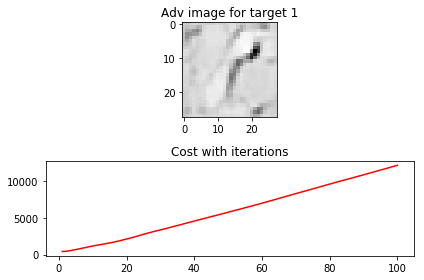

Target  tf.Tensor([4], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-4209.3647  2386.7136 -1993.5548 -4077.3208 20934.076   1171.6035
  -2144.6174 -2801.9182  1867.3186 -3296.561 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


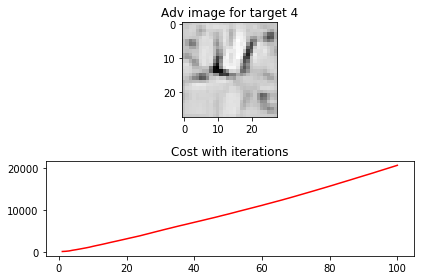

Target  tf.Tensor([9], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-5120.1006 -5019.355   -722.0273 10159.921  -1093.6665 10098.625
  -8190.354  -5459.8657  4660.5854 14847.021 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)


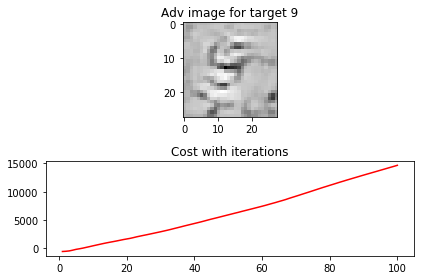

Target  tf.Tensor([5], shape=(1,), dtype=int32)
logits  tf.Tensor(
[[-8173.9185 -4805.0464 -5525.614   8198.895  -1348.5422 24844.8
  -1944.2384 -6799.5635  7070.014   9780.418 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


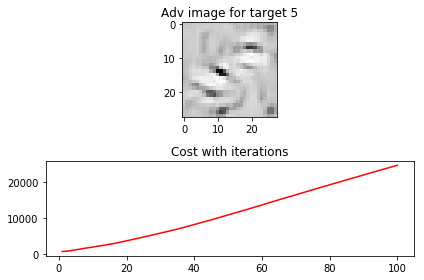

In [72]:
done=[]

for i, t in test_ds:
    original_image=i
    original_target=t
    break
    
for image,target in test_ds:
    if len(done)==9:
        break
    if target in done:
        continue
    elif target == original_target:
        continue
    else:
        done.append(target)
    print("Target ",target)
    adding_noise(original_image,target,image)

## Optimisation over images

1000
(1000,)
logits  tf.Tensor(
[[ 26651.09    -4253.253    1363.8027 -14828.562   -1568.9888    623.5074
   10534.79    -1802.1658  -3927.0278  -5855.767 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


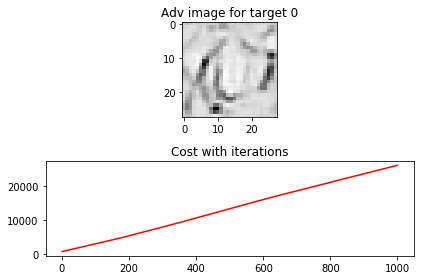

1000
(1000,)
logits  tf.Tensor(
[[-9645.144   24180.871   -9756.716   -9163.687   12497.033     511.77502
    592.5364    347.16415  2804.12    -3139.6882 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


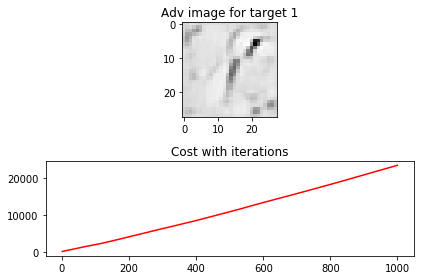

1000
(1000,)
logits  tf.Tensor(
[[ -3510.6948  14774.642   49021.84    -9488.328  -11094.679  -11734.21
  -10810.021    3929.3413  -3029.936  -10672.92  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


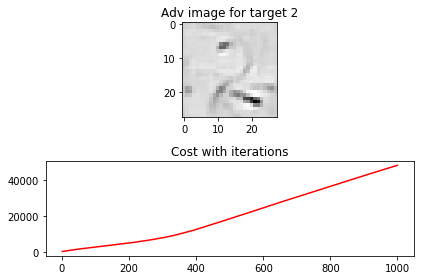

1000
(1000,)
logits  tf.Tensor(
[[-30780.598   -24951.598      138.25546  94148.17    -36401.887
   44310.76    -32278.232    -1668.2153    4494.732    26514.582  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


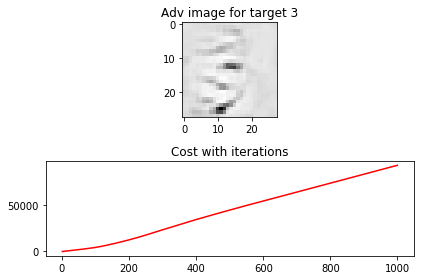

1000
(1000,)
logits  tf.Tensor(
[[ -6108.928   10982.527   -1028.6111 -22103.414   63334.715    -724.0374
   -3507.311   -5414.187    1343.9658 -17578.09  ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


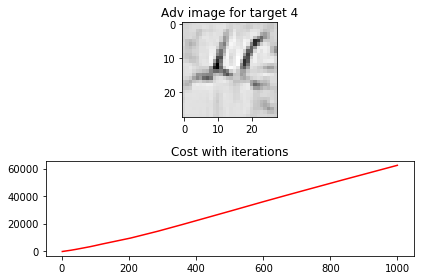

1000
(1000,)
logits  tf.Tensor(
[[-30097.203 -18251.852 -20657.893  22021.725   4157.624  89699.22
  -10067.24  -25458.164  22318.303  37588.195]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


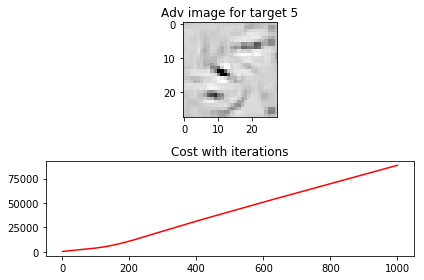

1000
(1000,)
logits  tf.Tensor(
[[  3298.3652  -9529.155    -986.1718 -21255.498   -4251.3374  28400.33
   61728.67   -19316.04    20804.615  -32613.764 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)


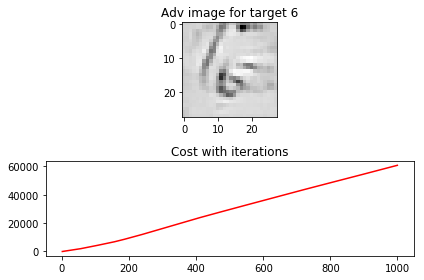

1000
(1000,)
logits  tf.Tensor(
[[  1850.8618  -2371.7986  -5342.1733 -10217.62    -1500.073    8997.058
   -4940.8276  32528.836   -2782.5767    813.1763]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)


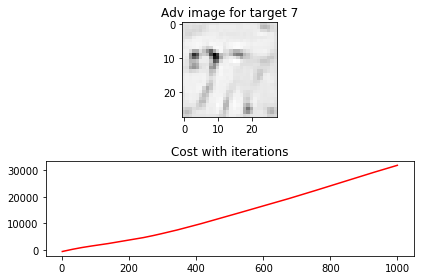

1000
(1000,)
logits  tf.Tensor(
[[-21169.566  -12185.07    -6100.913   17007.117   -9079.487   25184.473
   21839.309  -20701.66    52491.44     6614.1313]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)


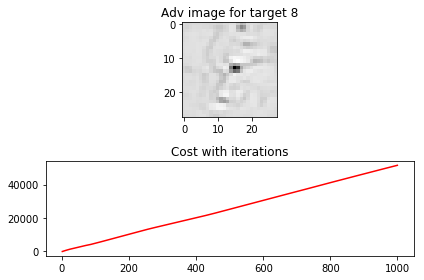

1000
(1000,)
logits  tf.Tensor(
[[-22811.229 -18067.406 -10663.594  22419.658  12889.143  27840.287
  -24090.197 -14477.297  14247.991  55037.45 ]], shape=(1, 10), dtype=float32)
Prediction Probabilities  tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)


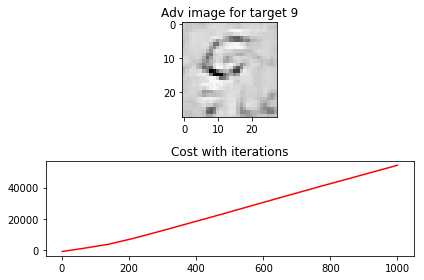

In [47]:
for j in range(10):
    non_targetted(j, reg=0.1)